# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [305]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np

# Create two new dataframes
south_df = pd.read_csv(r'/Users/cathleen/call-center-cleanup-assignment/SouthCallCenter.csv')
north_df = pd.read_csv(r'/Users/cathleen/call-center-cleanup-assignment/NorthCallCenter.csv')

south_df
north_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [306]:
# EDA Question 1A solution below:
# north_df
# north_df.info
north_df['Rep ID'].unique()



array(['Brent', 'Cam', 'Todd', 'Duke', 'Joe', 'Lilly', 'Amanda', 'Andy',
       'Xander'], dtype=object)

#### EDA Question 1B:  How many reps are in the South branch?  

In [307]:
# EDA Question 1B solution Below:
count_unique_reps_SB = south_df["Rep ID"].nunique()
count_unique_reps_SB
# There are 11 reps in the South branch.

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [308]:
# EDA Question 2A solution Below:
north_df
north_df["Busy Minutes"].mean() 
north_df["Not Ready Minutes"].mean()
north_df["Incoming Wait Time"].mean()
north_df["During Call Wait Time"].mean()

np.float64(2.9673469387755103)

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [309]:
# EDA Question 2B solution Below:
south_df
south_df["Busy Minutes"].mean()
south_df["Not Ready Minutes"].mean()
south_df["Incoming Wait Time"].mean()
south_df["During Call Wait Time"].mean()


np.float64(3.0764331210191083)

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [310]:
# EDA Question 3 solution Below:
df_combined = pd.concat([north_df,south_df], axis=0) 

sum_by_time_block = df_combined["Time Block"].value_counts()
sum_by_time_block




Time Block
12:00 PM    120
10:00 AM     99
3:00 PM      73
2:00 PM      65
11:00 AM     56
4:00 PM      53
5:00 PM      43
1:00 PM      40
9:00 AM      10
Name: count, dtype: int64

##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9 ['Brent', 'Cam', 'Todd', 'Duke', 'Joe', 'Lilly', 'Amanda', 'Andy', 'Xander']
- 1b) Reps in the South Branch =  11 ['Kate', 'Eric', 'Susan', 'Alice', 'Sandy', 'Karl', 'Randy','George', 'Helga', 'Josh', 'Sharon']


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.988
> - Not Ready Minutes = 1.914
> - Incoming Wait Time = 3.0488
> - During Call Wait Time = 2.967
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.054
> - Not Ready Minutes = 1.911
> - Incoming Wait Time = 3
> - During Call Wait Time = 3.076
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [311]:
# Question 1 solution below
# north_df.isnull().sum()
# For North columns 'Incoming Wait Time' has 163 nulls. These represent outgoing calls. I wonder if I can drop these rows.  
south_df.isnull().sum()
# For South columns 'Incoming Wait Time' has 188 nulls.These represent outgoing calls.  I wonder if I can drop these rows. 



Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

#### Record your answer below:

> Your Answer: The nulls are there because the calls are OUTGOING, so there cannot be a incoming wait time.  I'm going to delete those calls the wait time nulls with 0.   

In [312]:
cleaned_south_df=south_df.fillna(0)
cleaned_south_df
cleaned_north_df = north_df.fillna(0)
cleaned_north_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,0.0,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,0.0,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,0.0,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,0.0,2,1


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [313]:
# Cleaning Question 2 solution below:
cleaned_north_df["Sale"].unique()

array(['NO', 'YES ', 'YES'], dtype=object)

##### Record your answer by below:
> Your Answer: There are two separate values for YES in the sales column because one of the values has a trailing white space. 

In [314]:
# Remove trailing whitespace from "Sale" column
# cleaned_north_df['Sale'] = cleaned_north_df['Sale'].str.rstrip()
cleaned_north_df["Sale"].unique()

array(['NO', 'YES ', 'YES'], dtype=object)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [315]:
# Cleaning Question 3 solution below:
duplicates = cleaned_north_df.duplicated()
cleaned_north_df[duplicates]
# There are no duplicates in the North Branch dataframe.

duplicates = cleaned_south_df.duplicated()
cleaned_south_df[duplicates]
# There are no duplicates in the South Branch dataframe.

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


##### Record your answer below:
> Your Answer: There are no duplicates

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [316]:
# Cleaning Question 4 solution below:

##### Record your answer below:
> Your Answer: Incoming call data is not necessary to the analysis.


## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [317]:
# Create dataframe for the entire company named df
df=pd.concat([cleaned_north_df,cleaned_south_df], axis=0)
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 559 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             559 non-null    int64  
 1   Branch                 559 non-null    object 
 2   Call Purpose           559 non-null    object 
 3   Time Block             559 non-null    object 
 4   Incoming or Outgoing   559 non-null    object 
 5   Queue                  559 non-null    object 
 6   Rep ID                 559 non-null    object 
 7   Sale                   559 non-null    object 
 8   Lost Call              559 non-null    int64  
 9   Abandoned              559 non-null    int64  
 10  Busy Minutes           559 non-null    int64  
 11  Not Ready Minutes      559 non-null    int64  
 12  Incoming Wait Time     559 non-null    float64
 13  During Call Wait Time  559 non-null    int64  
 14  Calls                  559 non-null    int64  
dtypes: float64(

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [318]:
# Manipulation Question solution below:
# df.info()
calls_by_rep = df.groupby(["Rep ID", "Branch"])['Calls'].sum().reset_index()
# calls_by_rep
sort_calls = calls_by_rep.sort_values(by="Calls", ascending=False)
# sort_calls
most_calls_by_branch = sort_calls.loc[sort_calls.groupby("Branch")["Calls"].idxmax()]
most_calls_by_branch

,Rep ID,Branch,Calls
3,Brent,North,37
6,Eric,South,35


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent with 37 calls
- South Branch = Eric with 35 calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [364]:
# Manipulation Question 2 solution below:

# # Variables for filtering
value_a = 1


# # Filtering the data for both abandoned and incoming:
abandoned_calls_north = cleaned_north_df[cleaned_north_df["Abandoned"] == value_a]["Calls"].sum()
abandoned_calls_north
# # Result: 7 abandoned calls North Branch.

abandoned_calls_south = cleaned_south_df[cleaned_south_df["Abandoned"] == value_a]["Calls"].sum()
abandoned_calls_south
# # Result is 4 abandoned calls South Branch.

# Company-wide abandoned calls.
abandoned_calls =df[df["Abandoned"] == value_a]["Calls"].sum()
abandoned_calls
# Result is 11



# To get total calls by branch and company-wide:
total_calls = df["Calls"].sum()
north_total_calls = cleaned_north_df["Calls"].sum()
south_total_calls = cleaned_south_df["Calls"].sum()
total_calls
# Results for total calls  are North = 245, South = 314, and 559 company-wide.





np.int64(559)

In [365]:
# Next step is to calculate the percentage.
 

abandonment_rate_north_branch = abandoned_calls_north / north_total_calls
abandonment_rate_north_branch

# abandonment_rate_south_branch = abandoned_calls_south/south_total_calls
# abandonment_rate_south_branch
# company_abandonment_rate = abandoned_calls/total_calls
# company_abandonment_rate

np.float64(0.02857142857142857)

##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86, (7/245)   
- South Branch = 1.27% (4/245)
- Company Wide = 1.97% (11/559)
- Do any of these fall out of the optimal range of 2-5%?  Yes, it looks like the South Branch is doing better than expected. 


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [321]:
# Manipulation Question 3 solution below:
# % of calls answered where call wait time is < 2 seconds by company and each branch.
# Step 1: filter for all calls with wait time < 2 seconds
value_b = "Incoming"
wait_time_less_than_two_seconds = df.loc[(df["Incoming Wait Time"]<= 2) & (df["Incoming or Outgoing"] == value_b)]
counting_these = wait_time_less_than_two_seconds.groupby("Branch")["Calls"].sum()
counting_these
# North    33
# South    48

percentage_wait_time_by_branch = counting_these/incoming_calls_by_branch
percentage_wait_time_by_branch
# Percentages:
# North    0.402439
# South    0.380952

Branch
North    0.402439
South    0.380952
Name: Calls, dtype: float64

In [324]:
value_b = "Incoming"
company_less_than_two_seconds = df.loc[(df["Incoming Wait Time"]<= 2) & (df["Incoming or Outgoing"] == value_b)]
company_count = company_less_than_two_seconds["Calls"].sum()
company_count
# 81
incoming_call_total = df[df["Incoming or Outgoing"] == "Incoming"]["Calls"].sum()
incoming_call_total
percentage_wait_time_company = company_count/incoming_call_total
percentage_wait_time_company

np.float64(0.3894230769230769)

##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%, 33 calls.
- South Branch = 38.10%, 48 calls
- Company Wide = 38.94%, 81 calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [285]:
# Manipulation Question 4 solution below:
# The calculation for the average answer speed from column Incoming Wait Time.
value_b = "Incoming"
average_answer_speed = df[df["Incoming or Outgoing"] == value_b].groupby("Branch")
average_answer_speed_by_branch = average_answer_speed["Incoming Wait Time"].mean()
average_answer_speed_by_branch

value_b = "Incoming"
company_average_answer_speed = df[df["Incoming or Outgoing"] == value_b]
average_answer_speed_company = company_average_answer_speed["Incoming Wait Time"].mean()
average_answer_speed_company

np.float64(3.019230769230769)

##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.04
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

/var/folders/0c/492c90q90fbfbv5st6_n8n3w0000gn/T/ipykernel_1393/1478110618.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


Text(0.5, 1.0, 'Abandonment Rate by Queue')

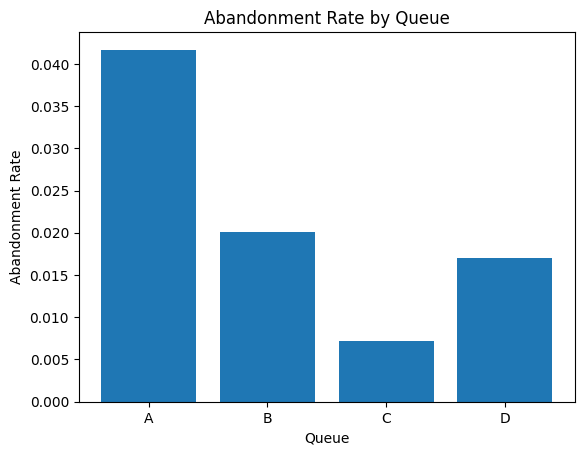

In [295]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:
import matplotlib.pyplot as plt
import seaborn as sns

queues = list(abandonment_rates.keys())
rates = list(abandonment_rates.values())

plt.bar (queues, rates)
plt.xlabel("Queue")
plt.ylabel("Abandonment Rate")
plt.title("Abandonment Rate by Queue")



##### Record your answer below:

> Chart style you chose and why:  I think a simple bar chart works for this 

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

TypeError: unhashable type: 'numpy.ndarray'

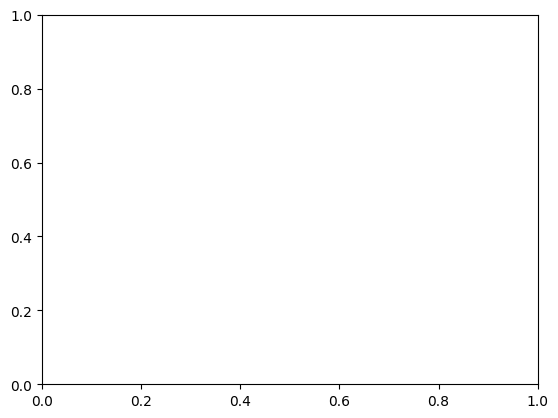

In [366]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = cleaned_north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = cleaned_north_df[cleaned_north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = cleaned_north_df[cleaned_north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax=plt.subplots()
ax.bar(quick_reps, quick_calls, label="Calls <=2 seconds")
ax.bar (quick_reps,quick_stats, bottom=quick_calls, label="fun")

ax.set_xlabel("Rep Id")
ax.set_ylabel("Number of Calls")
ax.set_title("blah")
ax.legend()

plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


# plt.bar (queues, rates)
# plt.xlabel("Queue")
# plt.ylabel("Abandonment Rate")
# plt.title("Abandonment Rate by Queue")


##### Record your answer below:

> Chart style you chose and why: 

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


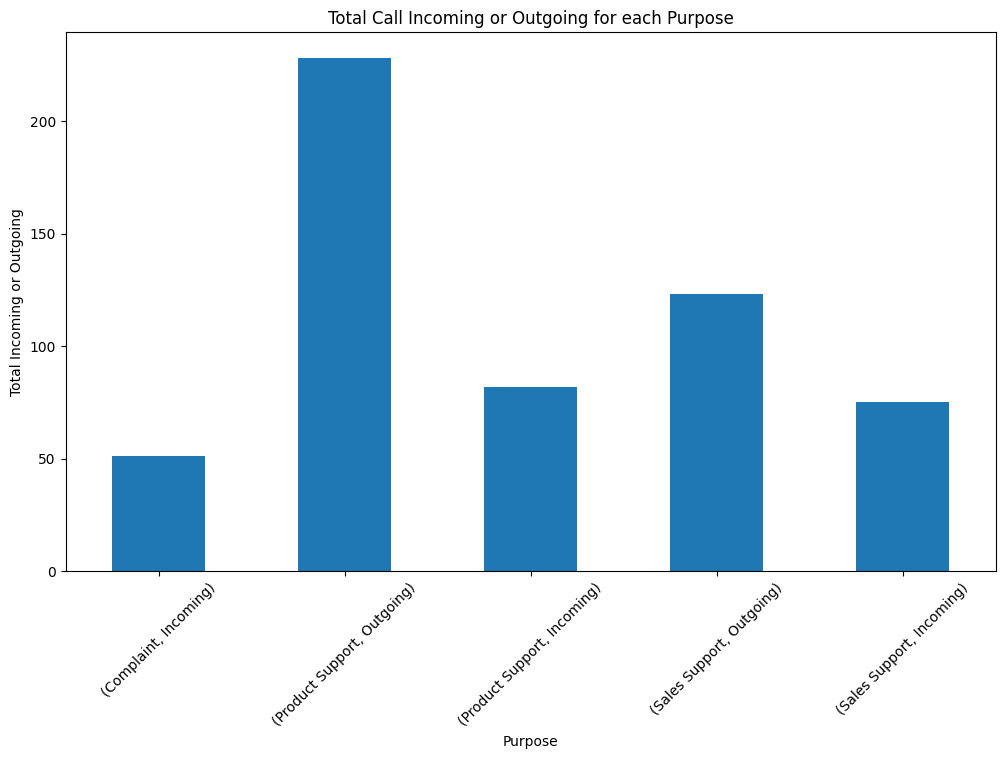

In [386]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

# #Your Code Here:

# Pivot the DataFrame to prepare data for the multiple bar chart
# pivot_df = purpose_group(index='call_purpose', columns='purpose_counts', values='Total', aggfunc='sum')
df_pivot = purpose_counts

# Plotting the multiple bar chart
df_pivot.plot(kind='bar', figsize=(12, 7))

# Add labels and title
plt.xlabel('Purpose')
plt.ylabel('Total Incoming or Outgoing')
plt.title('Total Call Incoming or Outgoing for each Purpose')

# Display the plot
plt.xticks(rotation=45)
plt.show()

##### Record your answer below:

> Chart style you chose and why:  Only the dictionaries sales_support, product_support contains counts of incoming and outgoing calls.  I need to figure out how to show how those two dictionary data is divided into the two types of calls.   The complaint are only incoming.  :(

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [377]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: